In [41]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import tqdm

# Summary of Problem

The misanthropes are coming. Suppose there is a row of some number, N, of houses in a new, initially empty development. Misanthropes are moving into the development one at a time and selecting a house at random from those that have nobody in them and nobody living next door. They keep on coming until no acceptable houses remain. At most, one out of two houses will be occupied; at least one out of three houses will be. But what’s the expected fraction of occupied houses as the development gets larger, that is, as N goes to infinity?

In [42]:
numPlots = 10
plots = pd.DataFrame({'plotNum': range(numPlots), 'occupied': False, 'withNeighbor': False})
plots

,occupied,plotNum,withNeighbor
0,False,0,False
1,False,1,False
2,False,2,False
3,False,3,False
4,False,4,False
5,False,5,False
6,False,6,False
7,False,7,False
8,False,8,False
9,False,9,False


In [43]:
plots.sample(1).index[0]

3

In [44]:
class Plots(object):
    def __init__(self, numPlots=1000, verbose=False):
        self.df = pd.DataFrame({
            'plotNum': range(numPlots),
            'occupied': False,
            'inhabitable': True,
        })
        self._numPlots = numPlots
        
    @property
    def occupied(self):
        return self.df[self.df.occupied]
    
    @property
    def unoccupied(self):
        return self.df[~self.df.occupied]
    
    @property
    def inhabitable(self):
        return self.df[self.df.inhabitable]
    
    @property
    def homesLeft(self):
        return self.df.inhabitable.any()
    
    def misanthrope_moves_in(self):
        newHouse = self.inhabitable.sample(1)
        i = newHouse.index[0]
        self.df.loc[i - 1: i + 1, 'inhabitable'] = False
        self.df.loc[i, 'occupied'] = True
    
    @property
    def frac_occupied(self):
        return self.occupied.shape[0] / self._numPlots

    
def single_sim(numPlots=1000):
    """create a df of numPlots empty plots, iterate through them
    until they are all occupied or neighbored
    
    """
    plots = Plots(numPlots)
    while plots.homesLeft:
        plots.misanthrope_moves_in()
    return plots


class Simulation(object):
    def __init__(self, numSims=100, numPlots=1000, verbose=False):
        self.numSims = numSims
        self.numPlots = numPlots
        self.verbose = verbose
        self.res = []
        
    def run(self):
        for i in tqdm.tqdm(range(self.numSims), total=self.numSims):
            p = single_sim(self.numPlots)
            self.res.append({
                'sim_num': i,
                'num_plots': self.numPlots,
                'frac_occupied': p.frac_occupied,
            })
    
    @property
    def df(self):
        return pd.DataFrame(self.res)

In [45]:
plots = Simulation(numPlots=5000)
plots.run()

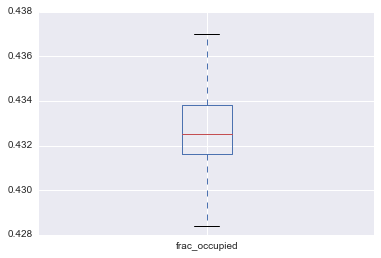

In [60]:
plots.df.frac_occupied.plot(kind='box');